In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


Text(0, 0.5, 'Смертность')

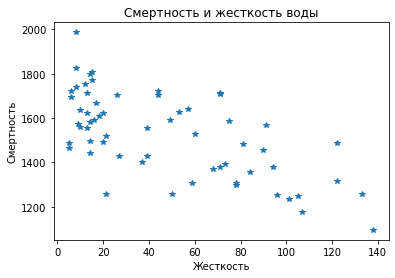

In [70]:
plt.plot(df['hardness'],df['mortality'], '*')
plt.title('Смертность и жесткость воды')
plt.xlabel('Жесткость')
plt.ylabel('Смертность')
#plt.show()
#plt.plot(df['mortality'],df['hardness'], '*')
#plt.title('Жесткость воды и смертность')
#plt.xlabel('Смертность')
#plt.ylabel('Жесткость')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

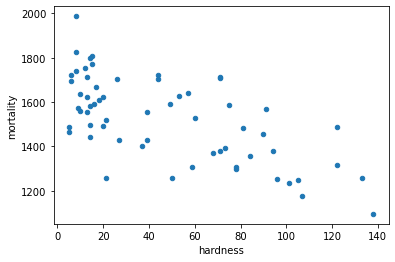

In [71]:
df.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

In [72]:
df[['hardness', 'mortality']].corr(method = 'pearson')

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [73]:
df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [74]:
df[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Имеется некоторая отрицательная корреляция (с увеличением жесткости воды смертность уменьшается). Ранговые коэффициенты здесь не особо хороши, да и по смыслу они здесь не очень подходят.

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
X = df[['hardness']]
Y = df[['mortality']]

In [77]:
x_line = LinearRegression()
x_line.fit(X, Y)

LinearRegression()

In [78]:
print ( 'Коэффициент детерминации R^2 =', x_line.score(X, Y))

Коэффициент детерминации R^2 = 0.4288267193124974


In [79]:
x_line.coef_

array([[-3.22609161]])

In [80]:
x_line.intercept_

array([1676.3556007])

Уравнение линейной регрессии: mortality = -3.2261 * hardness + 1676.36
Значение коэффициента детерминации менее 50% говорит о не очень хорошем описании изменения смертности изменением жесткости воды. Какая-то слабая связь есть, но она далека от функциональной, немного разбавленной случайной составляющей.

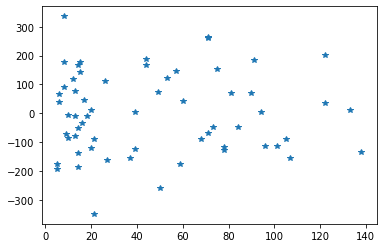

In [81]:
# Посмотрим остатки
YY = x_line.predict(X)
residual = Y - YY

plt.plot(df['hardness'],residual, '*')

(array([ 1.,  1.,  7., 13.,  9.,  8.,  9.,  9.,  3.,  1.]),
 array([-348.60767697, -280.10159606, -211.59551515, -143.08943423,
         -74.58335332,   -6.07727241,   62.4288085 ,  130.93488941,
         199.44097033,  267.94705124,  336.45313215]),
 <BarContainer object of 10 artists>)

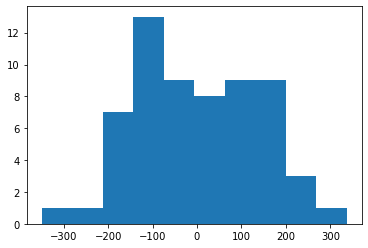

In [82]:
plt.hist(residual)

Остатки: более-менее симметричны относительно нуля (хотя выброс в районе -100 неприятен), почти равномерны (если отбросить все, что по модулю более 200, а таких случаев всего 5 из 61, т.е. порядка 8%). В идеале они должны были бы сосредоточиться в окрестностях нуля, но они лежат от -200 до +200, а это 40% от диапазона изменения смертности. Многовато :-)

In [ ]:
# Север против Юга

In [83]:
df_s = df[df['location'] != 'North'][['mortality','hardness']]
df_n = df[df['location'] != 'South'][['mortality','hardness']]

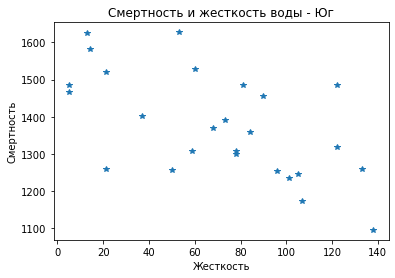

Text(0, 0.5, 'Смертность')

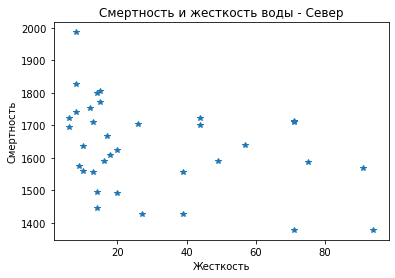

In [84]:
plt.plot(df_s['hardness'],df_s['mortality'], '*')
plt.title('Смертность и жесткость воды - Юг')
plt.xlabel('Жесткость')
plt.ylabel('Смертность')
plt.show()
plt.plot(df_n['hardness'],df_n['mortality'], '*')
plt.title('Смертность и жесткость воды - Север')
plt.xlabel('Жесткость')
plt.ylabel('Смертность')


In [85]:
df_s[['hardness', 'mortality']].corr(method = 'pearson')

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [86]:
df_n[['hardness', 'mortality']].corr(method = 'pearson')

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [87]:
df_s[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [88]:
df_n[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [89]:
df_s[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [56]:
df_n[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


По отдельности для регионов (внутри регионов) связь между смертностью и жесткостью воды слабее, чем вместе, особенно для Севера. При этом на Севере жесткость воды менее, чем на Юге, а смертность в среднем выше, чем на Юге. Возможно, что дело не только в жесткости воды, а и в каких-то других или дополнительных факторах, отличающих жизнь на Севере и на Юге.

Проведем формально требуемые действия:

In [90]:
X_S = df_s[['hardness']]
Y_S = df_s[['mortality']]

X_N = df_n[['hardness']]
Y_N = df_n[['mortality']]

s_line = LinearRegression()
s_line.fit(X_S, Y_S)

n_line = LinearRegression()
n_line.fit(X_N, Y_N)

print ( 'Коэффициент детерминации R^2 ЮГ =', s_line.score(X_S, Y_S))
print ( 'Коэффициент детерминации R^2 СЕВЕР =', n_line.score(X_N, Y_N))

Коэффициент детерминации R^2 ЮГ = 0.3625885624364601
Коэффициент детерминации R^2 СЕВЕР = 0.1358643664207173


In [91]:
s_line.coef_

array([[-2.09271845]])

In [92]:
s_line.intercept_

array([1522.81504854])

In [93]:
n_line.coef_

array([[-1.93134215]])

In [94]:
n_line.intercept_

array([1692.31280143])

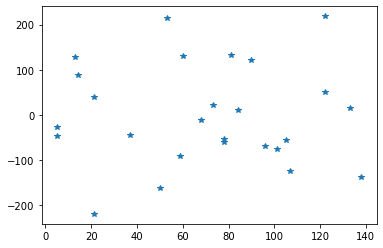

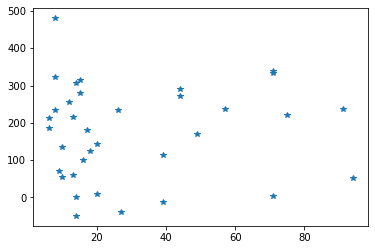

In [95]:
YY_S = s_line.predict(X_S)
residual_s = Y_S - YY_S

YY_N = s_line.predict(X_N)
residual_n = Y_N- YY_N

plt.plot(df_s['hardness'],residual_s, '*')
plt.show()
plt.plot(df_n['hardness'],residual_n, '*')

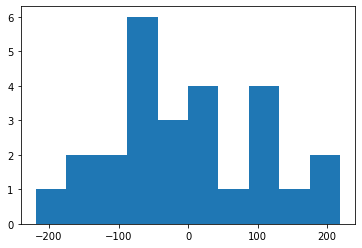

(array([4., 4., 3., 4., 5., 6., 5., 3., 0., 1.]),
 array([-49.51699029,   3.52737864,  56.57174757, 109.6161165 ,
        162.66048544, 215.70485437, 268.7492233 , 321.79359223,
        374.83796117, 427.8823301 , 480.92669903]),
 <BarContainer object of 10 artists>)

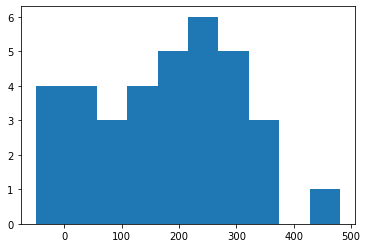

In [96]:
plt.hist(residual_s)
plt.show()
plt.hist(residual_n)

С остатками по отдельности также хуже (особенно для Севера): и с симметрией больше проблем, и со смещенностью относительно нуля. 

По отдельности для Севера зависимость смертности от жесткости воды не сохраняется, а для Юга эта зависимость ослабевает.